In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

In [3]:
#Loading of the titanics dataset for classification of survival

titanic_df = pd.read_csv('/Users/romainlejeune/Desktop/Python/Random files/titanic.csv')

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

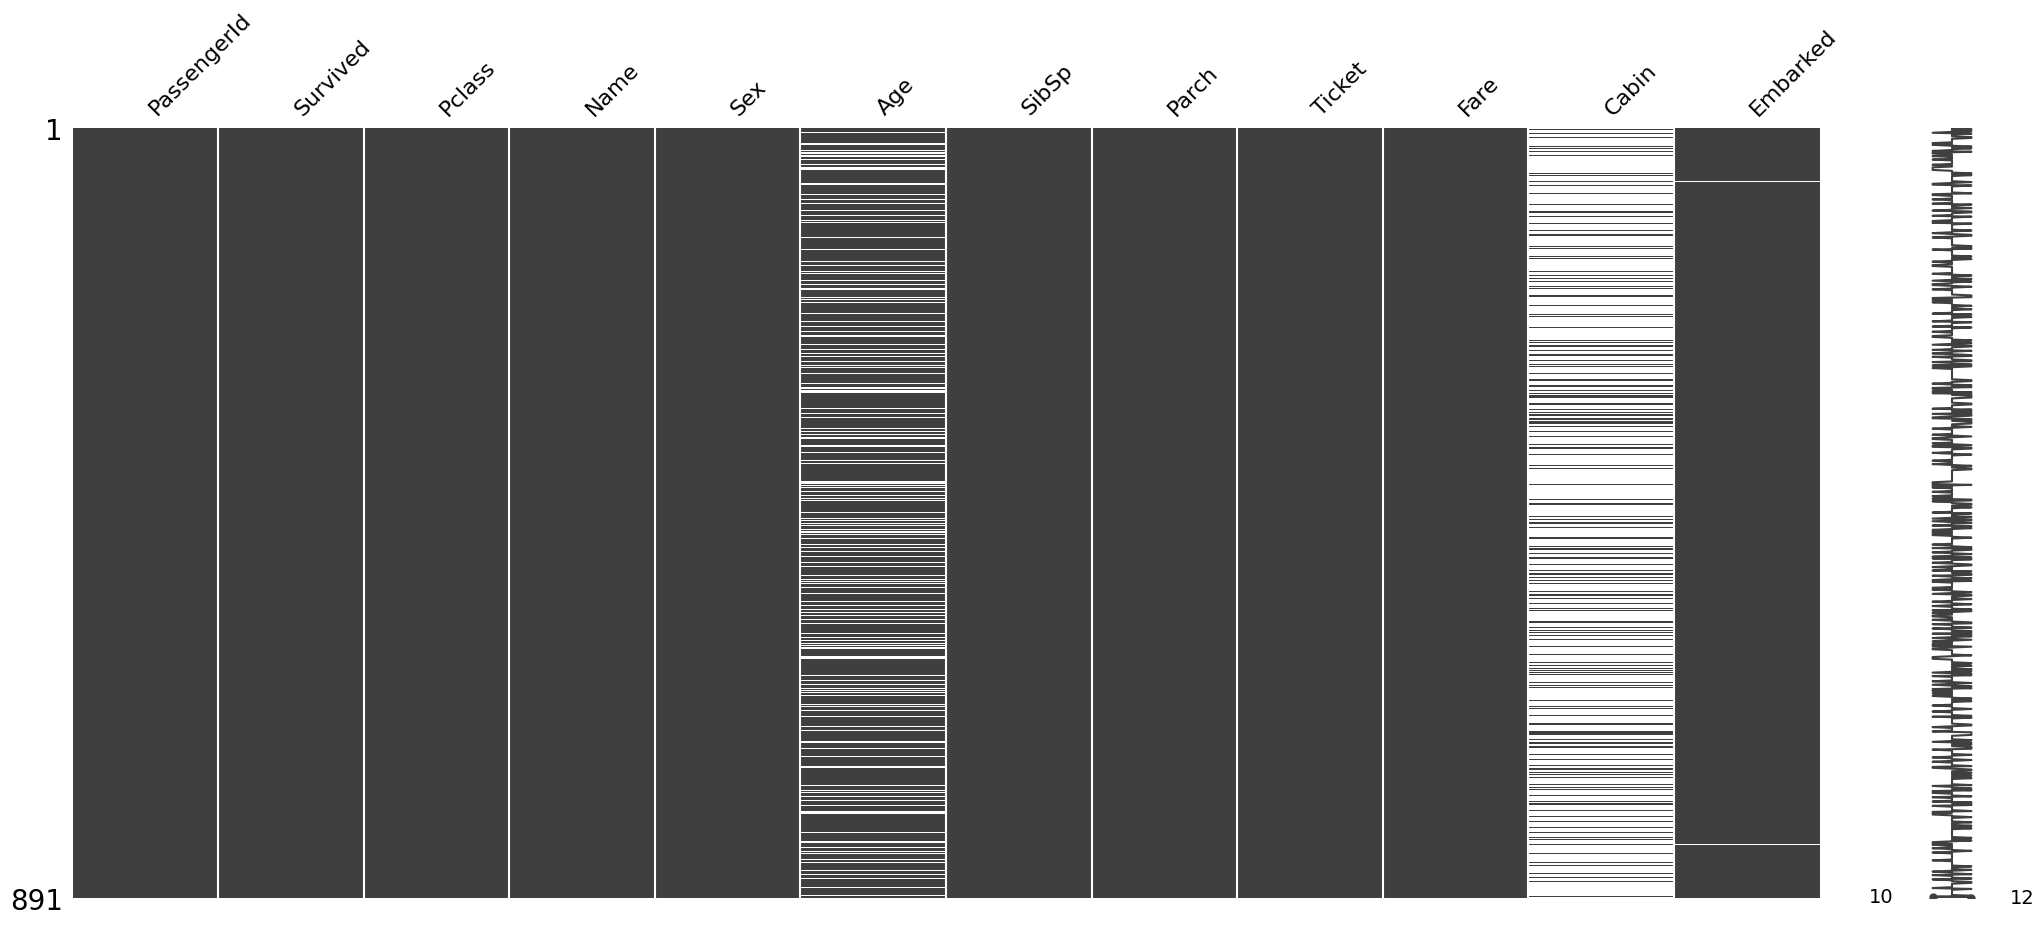

In [4]:
#Import missingno to visualize missing data
import missingno as msno

msno.matrix(titanic_df)

<Axes: >

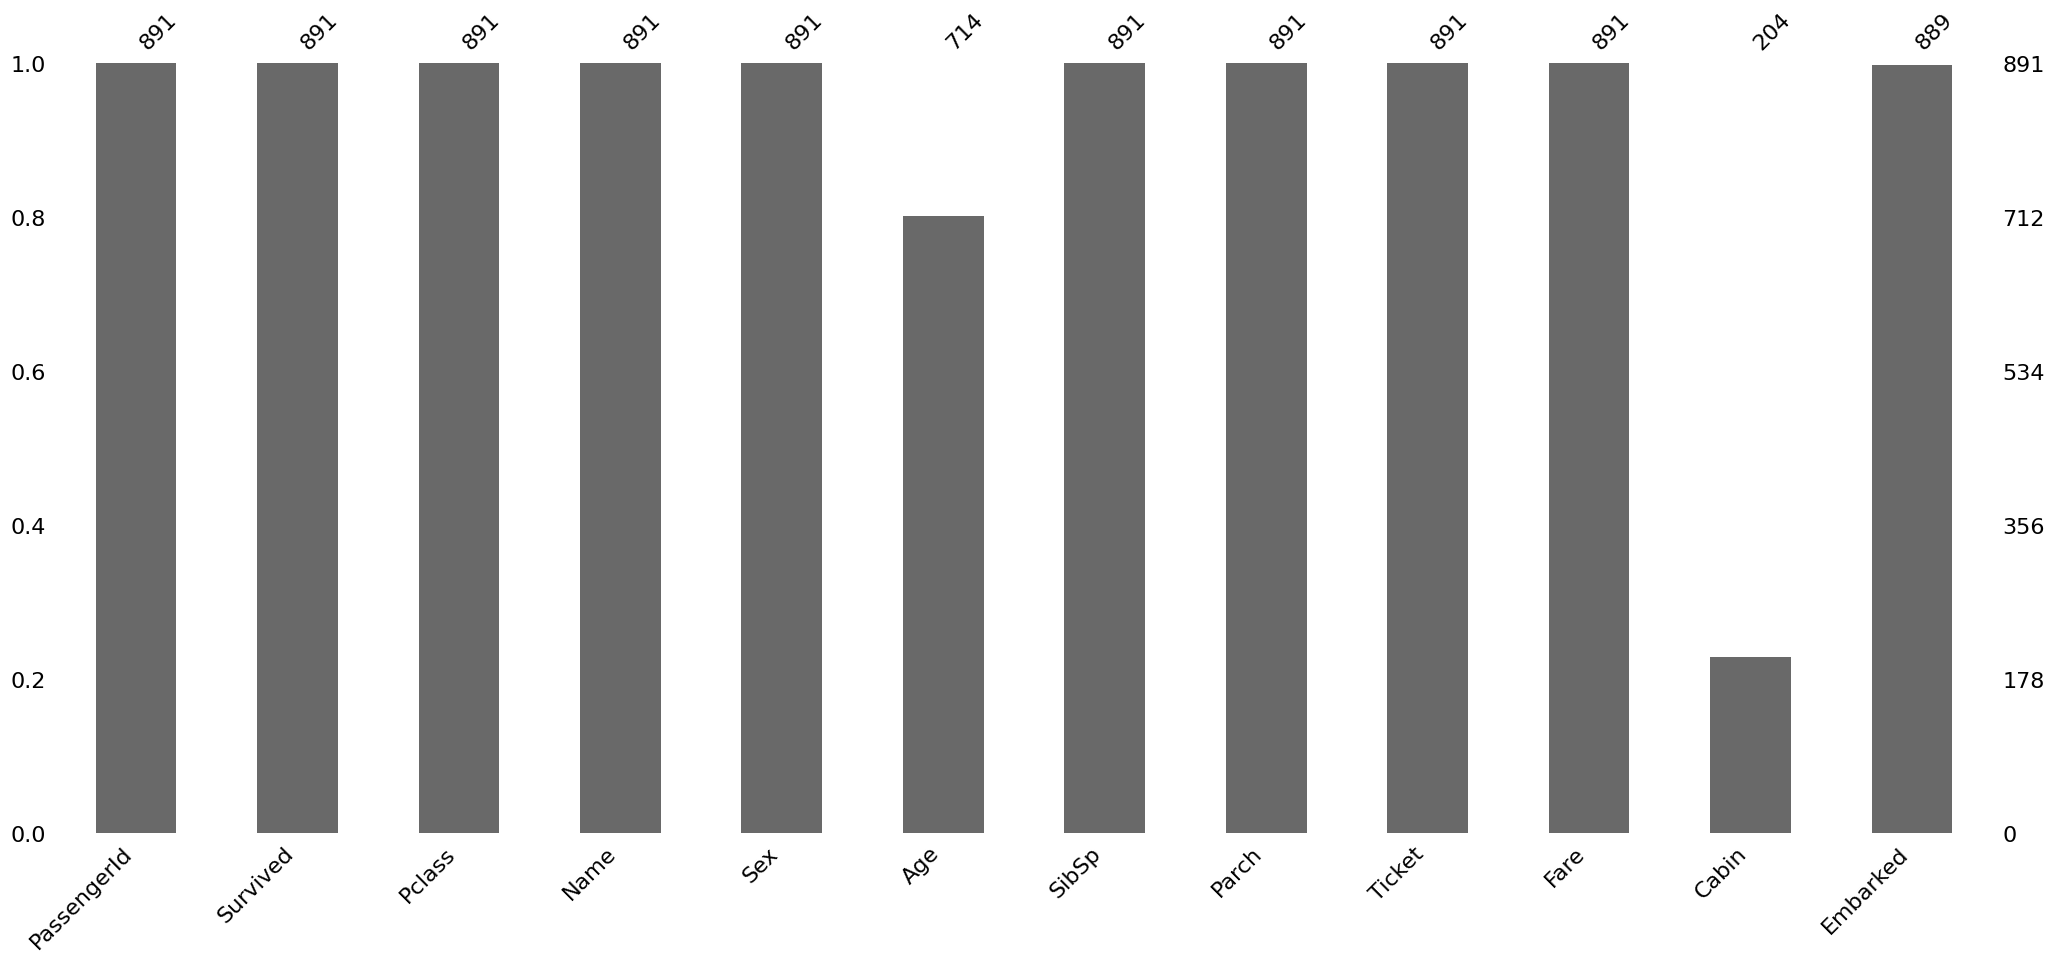

In [5]:
#Affichage des valeurs nulles par colonne
msno.bar(titanic_df)

In [6]:
#Description of the columns with missing values 
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [7]:
#Description of cabin values 
titanic_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

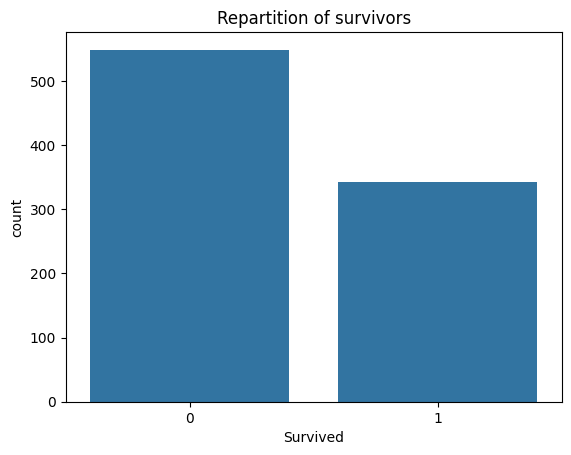

In [8]:
#Repartition of survivors
sns.countplot(x='Survived', data=titanic_df)
plt.title('Repartition of survivors')
plt.show()

# Quick Overview of the data

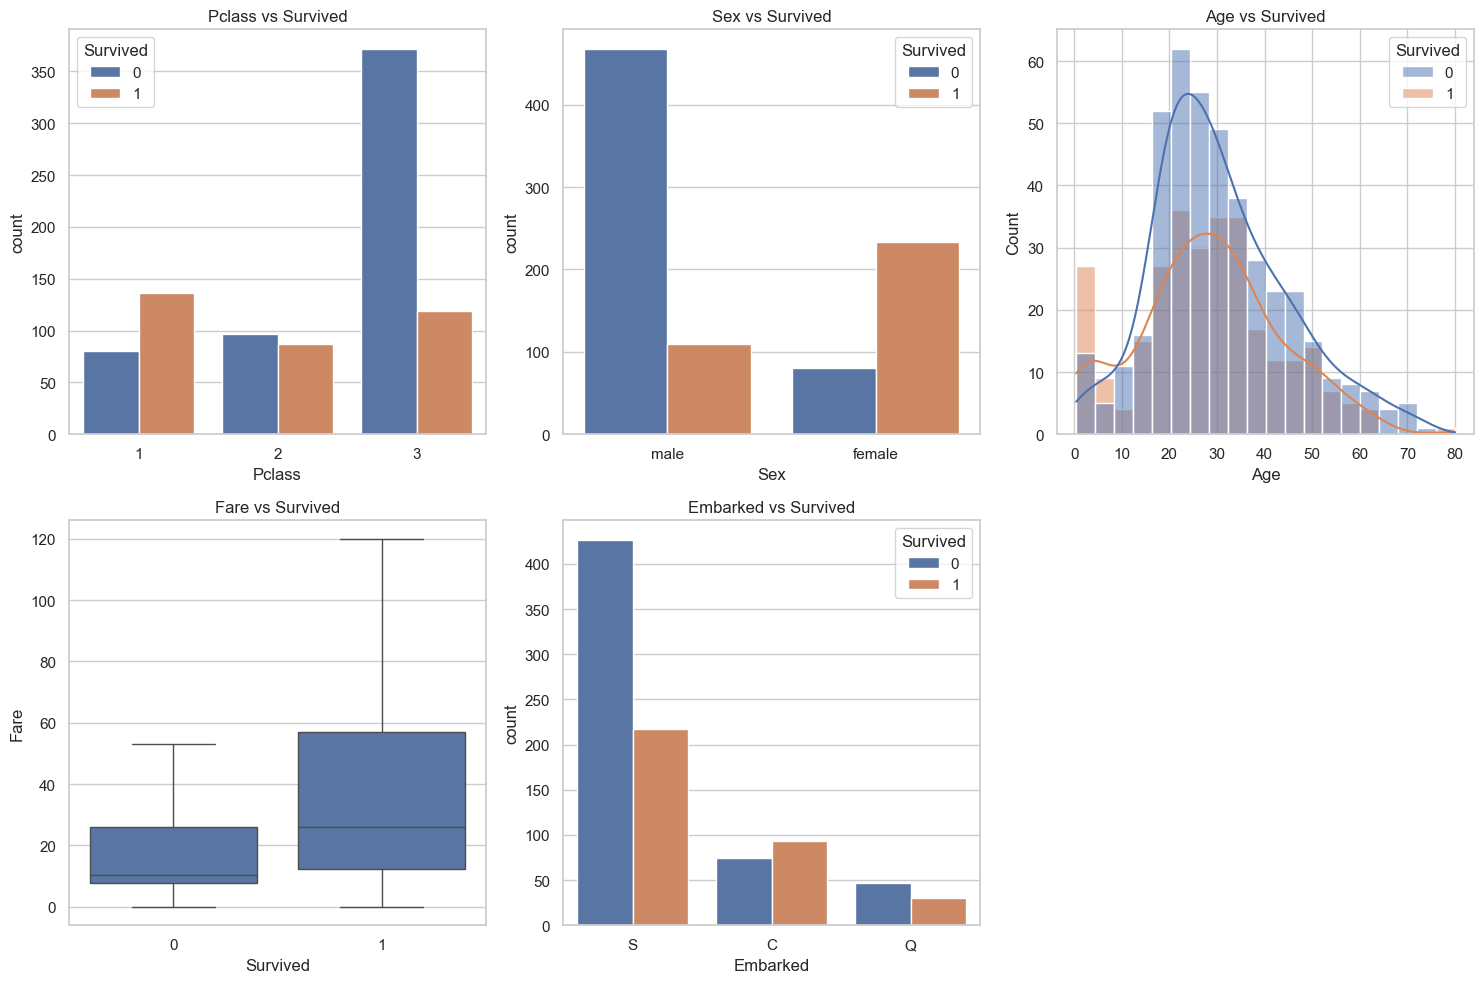

In [14]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Plot Pclass vs Survived
sns.countplot(x='Pclass', hue='Survived', data=titanic_df, ax=axs[0, 0])
axs[0, 0].set_title('Pclass vs Survived')

# Plot Sex vs Survived
sns.countplot(x='Sex', hue='Survived', data=titanic_df, ax=axs[0, 1])
axs[0, 1].set_title('Sex vs Survived')

# Plot Age vs Survived
sns.histplot(data=titanic_df, x='Age', hue='Survived', kde=True, ax=axs[0, 2])
axs[0, 2].set_title('Age vs Survived')

# Plot Fare vs Survived (Boxplot without outliers)
sns.boxplot(x='Survived', y='Fare', data=titanic_df, showfliers=False, ax=axs[1, 0])
axs[1, 0].set_title('Fare vs Survived')

# Plot Embarked vs Survived
sns.countplot(x='Embarked', hue='Survived', data=titanic_df, ax=axs[1, 1])
axs[1, 1].set_title('Embarked vs Survived')

# Remove the empty subplot
fig.delaxes(axs[1, 2])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [8]:
#Get first letter of the cabin to see if it has an impact on survival
titanic_df['Cabin'] = titanic_df['Cabin'].str[0]
titanic_df['Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

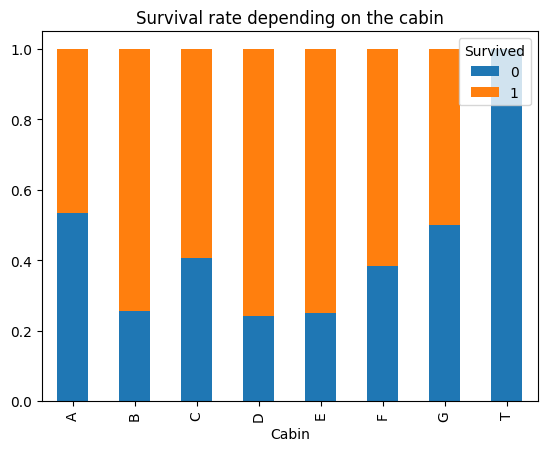

In [9]:
#Crosstab getting the percentage of survival depending on the cabin

cabin_survived = pd.crosstab(titanic_df['Cabin'], titanic_df['Survived'], normalize='index')
cabin_survived.plot(kind='bar', stacked=True)
plt.title('Survival rate depending on the cabin')
plt.show()

## Extraction des infos de famille et titres

In [10]:
#Extract the title from the name in a column : for example Mr, Mrs, Miss, etc
titanic_df['Title'] = titanic_df['Name'].str.extract('([A-Za-z]+)\.')
titanic_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [11]:
#Value counts of the titles
titanic_df['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [12]:
#Extract Family name from the name
titanic_df['Family_name'] = titanic_df['Name'].str.extract('([A-Za-z]+)\,')
titanic_df['Family_name'].unique()

array(['Braund', 'Cumings', 'Heikkinen', 'Futrelle', 'Allen', 'Moran',
       'McCarthy', 'Palsson', 'Johnson', 'Nasser', 'Sandstrom', 'Bonnell',
       'Saundercock', 'Andersson', 'Vestrom', 'Hewlett', 'Rice',
       'Williams', 'Planke', 'Masselmani', 'Fynney', 'Beesley', 'McGowan',
       'Sloper', 'Asplund', 'Emir', 'Fortune', 'Dwyer', 'Todoroff',
       'Uruchurtu', 'Spencer', 'Glynn', 'Wheadon', 'Meyer', 'Holverson',
       'Mamee', 'Cann', 'Yarred', 'Ahlin', 'Turpin', 'Kraeff', 'Laroche',
       'Devaney', 'Rogers', 'Lennon', 'Driscoll', 'Samaan', 'Franchi',
       'Panula', 'Nosworthy', 'Harper', 'Faunthorpe', 'Ostby', 'Woolner',
       'Rugg', 'Novel', 'West', 'Goodwin', 'Sirayanian', 'Icard',
       'Harris', 'Skoog', 'Stewart', 'Moubarek', 'Nye', 'Crease', 'Kink',
       'Jenkin', 'Hood', 'Chronopoulos', 'Bing', 'Moen', 'Staneff',
       'Moutal', 'Caldwell', 'Dowdell', 'Waelens', 'Sheerlinck',
       'McDermott', 'Carrau', 'Ilett', 'Backstrom', 'Ford', 'Slocovski',
       '

In [13]:
#Checking if there are people of the same family
titanic_df['Family_name'].value_counts()

Family_name
Andersson    9
Sage         7
Panula       6
Johnson      6
Skoog        6
            ..
Hanna        1
Lewy         1
Mineff       1
Haas         1
Dooley       1
Name: count, Length: 666, dtype: int64

## Etude des tickets

In [14]:
#To be same family, the family name should be the same and the ticket number should be the same
titanic_df['Ticket'].value_counts()


Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [15]:
#Getting the patterns of the ticket number example : A/5, PC, etc
titanic_df['Ticket_pattern'] = titanic_df['Ticket'].str.extract('([A-Za-z\/]+)')
titanic_df['Ticket_pattern'].unique()

array(['A/', 'PC', 'STON/O', nan, 'PP', 'C', 'A', 'SC/Paris', 'S', 'CA',
       'SO/C', 'W', 'SOTON/OQ', 'SOTON/O', 'SC/PARIS', 'Fa', 'LINE', 'F',
       'W/C', 'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'WE/P'],
      dtype=object)

In [16]:
#Lenght of ticket number without the ticket pattern exemple : 123456

titanic_df['Ticket_length'] = titanic_df['Ticket'].str.extract('([0-9]+)')
titanic_df['Ticket_length'] = titanic_df['Ticket_length'].str.len()
titanic_df['Ticket_length'].unique()

array([ 1.,  5.,  6.,  4.,  7., nan,  3.])

Text(0.5, 1.0, 'Survival rate depending on the ticket length')

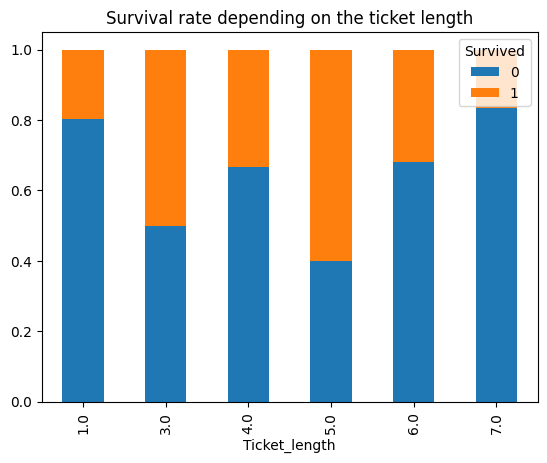

In [17]:
#Checking if the len of th ticket changes the survival rate
ticket_length_survived = pd.crosstab(titanic_df['Ticket_length'], titanic_df['Survived'], normalize='index')
ticket_length_survived.plot(kind='bar', stacked=True)
plt.title('Survival rate depending on the ticket length')

Text(0.5, 1.0, 'Ticket length depending on the cabin')

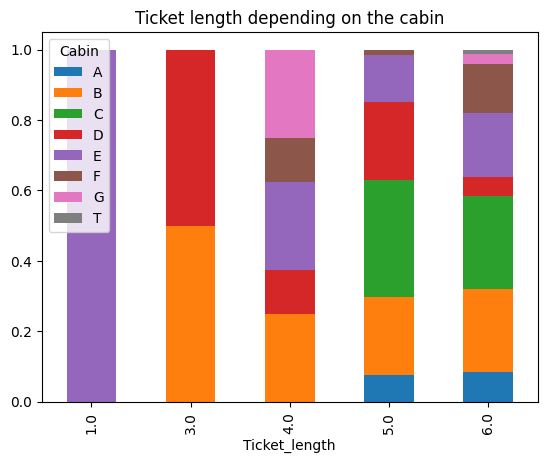

In [18]:
#Ticket lenght with the type of cabin
ticket_length_cabin = pd.crosstab(titanic_df['Ticket_length'], titanic_df['Cabin'], normalize='index')
ticket_length_cabin.plot(kind='bar', stacked=True)
plt.title('Ticket length depending on the cabin')

Text(0.5, 1.0, 'Ticket pattern depending on the cabin')

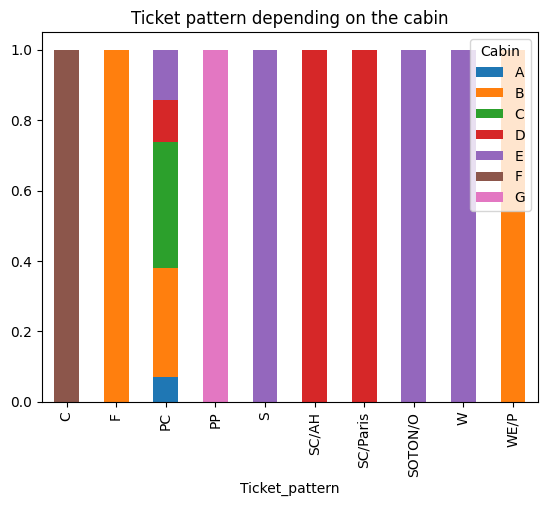

In [19]:
#Using the pattern of the ticket for the type of cabin
ticket_pattern_cabin = pd.crosstab(titanic_df['Ticket_pattern'], titanic_df['Cabin'], normalize='index')
ticket_pattern_cabin.plot(kind='bar', stacked=True)
plt.title('Ticket pattern depending on the cabin')

In [20]:
#Fill the cabing using the ticket pattern C:F, F:B, PP: G, S: E, SC/AH : D, SC/PARIS : D, SOTON/O : E, W : E, WE/P : B using a dictionary

cabin_dict = {'C':'F', 'F':'B', 'PP':'G', 'S':'E', 'SC/AH':'D', 'SC/PARIS':'D', 'SOTON/O':'E', 'W':'E', 'WE/P':'B'}
titanic_df['Cabin'] = titanic_df['Cabin'].fillna(titanic_df['Ticket_pattern'].map(cabin_dict))


In [21]:
titanic_df['Cabin'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Cabin
Non-Null Count  Dtype 
--------------  ----- 
279 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [22]:
#If the ticket lenght is 1, then cabin E, if the lenght is 3 then 0.5 proba to be B the other 0.5 to be E
import random

def predict_cabin_based_on_ticket_length(ticket_length):
    if ticket_length == 1:
        return 'E'
    elif ticket_length == 3:
        # Here we assign 0.5 probability for B and 0.5 for E
        return random.choice(['B', 'E'])
    else:
        return None  # Handle other cases as needed

# Assuming you have a DataFrame titanic_df with a column 'Ticket_length'
# Fill missing values in 'Cabin' based on 'Ticket_length'
titanic_df['Cabin'] = titanic_df.apply(lambda row: row['Cabin'] if pd.notnull(row['Cabin']) else predict_cabin_based_on_ticket_length(row['Ticket_length']), axis=1)


In [23]:
titanic_df['Cabin'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Cabin
Non-Null Count  Dtype 
--------------  ----- 
327 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [24]:
#Create a dictionnary with as key the ticket number and as value the cabin if cabin is not None
ticket_cabin_dict = titanic_df.set_index('Ticket')['Cabin'].to_dict()
ticket_cabin_dict = {k: v for k, v in ticket_cabin_dict.items() if v is not None}
ticket_cabin_dict

{'A/5 21171': 'E',
 'PC 17599': 'C',
 'STON/O2. 3101282': 'E',
 '113803': 'C',
 '17463': 'E',
 'PP 9549': 'G',
 '113783': 'C',
 'A/5. 2151': 'E',
 '248698': 'D',
 '113788': 'A',
 '19950': 'C',
 'PC 17569': 'B',
 'C.A. 24579': 'F',
 'A./5. 2152': 'E',
 'S.C./A.4. 23567': 'E',
 'A/4. 39886': 'E',
 'PC 17572': 'D',
 '113509': 'B',
 '19947': 'C',
 'C.A. 31026': 'F',
 'C.A. 34651': 'F',
 '113572': 'B',
 '36973': 'C',
 'C.A. 29395': 'F',
 'S.P. 3464': 'E',
 'C.A. 33111': 'F',
 'S.O.C. 14879': 'E',
 '348123': 'F',
 'W./C. 6608': 'E',
 'W.E.P. 5734': 'E',
 'C.A. 2315': 'F',
 'PC 17754': 'A',
 'PC 17759': 'D',
 '35281': 'D',
 '110465': 'A',
 'STON/O 2. 3101294': 'E',
 'PC 17558': 'B',
 'A4. 54510': 'E',
 '27267': 'E',
 'C 17369': 'F',
 'SOTON/O.Q. 3101307': 'E',
 'A/5. 3337': 'E',
 'C.A. 29178': 'F',
 'SC/PARIS 2133': 'D',
 '11752': 'D',
 'PC 17593': 'B',
 'STON/O2. 3101279': 'E',
 'C.A. 33112': 'F',
 '230080': 'F',
 'S.O.P. 1166': 'E',
 '113776': 'C',
 'A.5. 11206': 'E',
 'A/5. 851': 'E',
 'C.

In [25]:
#map the dictionary to the cabin column
titanic_df['Cabin'] = titanic_df['Cabin'].fillna(titanic_df['Ticket'].map(ticket_cabin_dict))
titanic_df['Cabin'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Cabin
Non-Null Count  Dtype 
--------------  ----- 
333 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


## Creation de family size

In [26]:
#Checking size of family with type of cabins
titanic_df['Family_size'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df['Family_size'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11])

## Etudes des cabines

<Axes: xlabel='Cabin', ylabel='Family_size'>

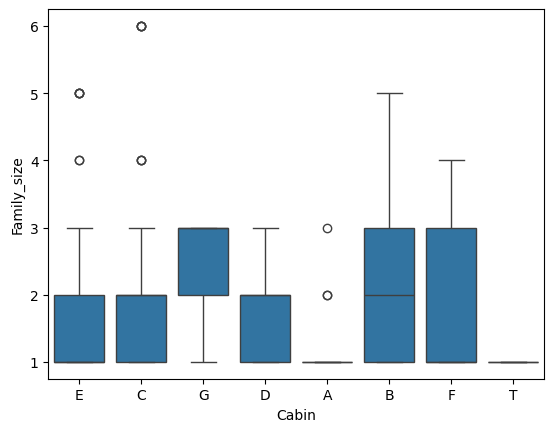

In [27]:
#Comparing family size with cabin type
sns.boxplot(x='Cabin', y='Family_size', data=titanic_df)

<Axes: xlabel='Cabin', ylabel='Fare'>

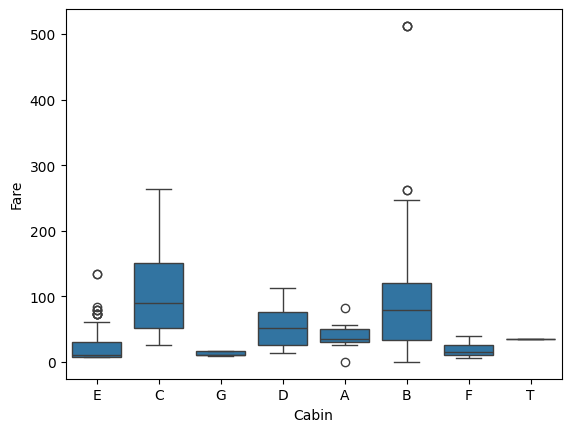

In [28]:
#Fare price by cabin
sns.boxplot(x='Cabin', y='Fare', data=titanic_df)

In [29]:
#Fill the empty cabin that have a fare price above 150 with random C and B Equal Probability
def predict_cabin_based_on_fare(fare):
    if fare > 150:
        return random.choice(['C', 'B'])
    else:
        return None

titanic_df['Cabin'] = titanic_df.apply(lambda row: row['Cabin'] if pd.notnull(row['Cabin']) else predict_cabin_based_on_fare(row['Fare']), axis=1)

In [30]:
titanic_df['Cabin'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Cabin
Non-Null Count  Dtype 
--------------  ----- 
335 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


<Axes: xlabel='Embarked'>

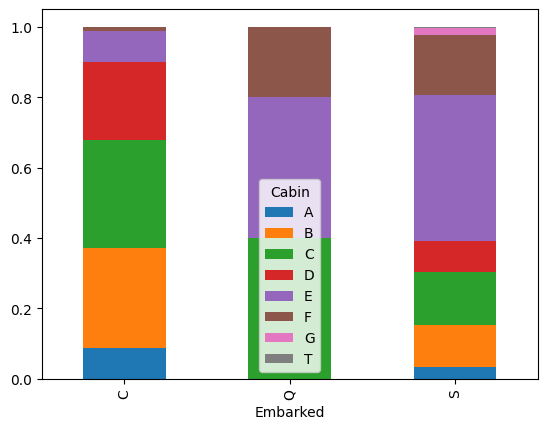

In [31]:
#Type of cabin by embarkation port normalized

embarked_cabin = pd.crosstab(titanic_df['Embarked'], titanic_df['Cabin'], normalize='index')
embarked_cabin.plot(kind='bar', stacked=True)

<Axes: xlabel='Pclass'>

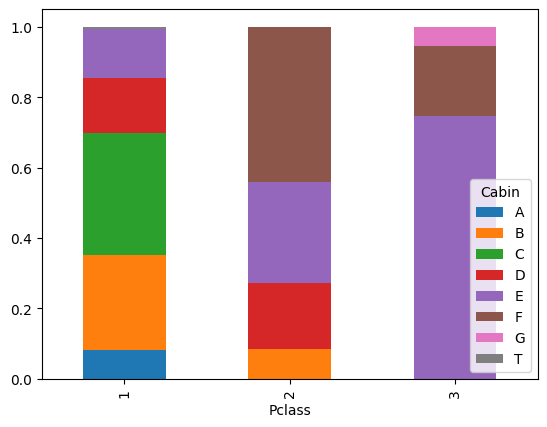

In [32]:
#Type of cabin depending of the class
class_cabin = pd.crosstab(titanic_df['Pclass'], titanic_df['Cabin'], normalize='index')
class_cabin.plot(kind='bar', stacked=True)

# Family size to fill the cabin

In [33]:
#Create a feature Family_name_size
titanic_df['Family_name_size'] = titanic_df['Family_name'] + titanic_df['Family_size'].astype(str)
titanic_df['Family_name_size'].value_counts()

Family_name_size
Andersson7    8
Sage11        7
Goodwin8      6
Skoog6        6
Panula6       6
             ..
Nilsson1      1
Moraweck1     1
Spedden3      1
Dennis1       1
Dooley1       1
Name: count, Length: 700, dtype: int64

In [34]:
#Using the family_name_size to fill the cabin creating a dictionnary with the family name size and the cabin
# Using the 'Family_name_size' to fill the 'Cabin' and creating a dictionary with the family name size and the cabin
family_name_size_cabin_dict = titanic_df.dropna(subset=['Cabin']).set_index('Family_name_size')['Cabin'].to_dict()
family_name_size_cabin_dict


{'Braund2': 'E',
 'Cumings2': 'C',
 'Heikkinen1': 'E',
 'Futrelle2': 'C',
 'McCarthy1': 'E',
 'Sandstrom3': 'G',
 'Bonnell1': 'C',
 'Saundercock1': 'E',
 'Beesley1': 'D',
 'Sloper1': 'A',
 'Fortune6': 'C',
 'Spencer2': 'B',
 'Wheadon1': 'F',
 'Cann1': 'E',
 'Rogers1': 'E',
 'Nosworthy1': 'E',
 'Harper2': 'D',
 'Ostby2': 'B',
 'Woolner1': 'C',
 'Rugg1': 'F',
 'West4': 'F',
 'Icard1': 'B',
 'Harris2': 'C',
 'Nye1': 'F',
 'Crease1': 'E',
 'Jenkin1': 'F',
 'Hood1': 'E',
 'Moen1': 'F',
 'Ford5': 'E',
 'Chaffee2': 'E',
 'Dean4': 'F',
 'Goldschmidt1': 'A',
 'Greenfield2': 'D',
 'White2': 'D',
 'Porter1': 'C',
 'Pekoniemi1': 'E',
 'Baxter2': 'B',
 'Hickman3': 'E',
 'Moore1': 'E',
 'Webber1': 'E',
 'Madsen1': 'F',
 'Peter3': 'F',
 'Coelho1': 'E',
 'Robins2': 'E',
 'Sobey1': 'F',
 'Richard1': 'D',
 'Newsom3': 'D',
 'Giglio1': 'B',
 'Hakkarainen2': 'E',
 'Nicholls3': 'F',
 'Navratil3': 'F',
 'Bateman1': 'E',
 'Pears2': 'C',
 'Meo1': 'E',
 'Billiard3': 'E',
 'Watt1': 'F',
 'Chibnall2': 'E',
 'hoef

In [35]:
#Filling the cabin using the family_name_size
titanic_df['Cabin'] = titanic_df['Cabin'].fillna(titanic_df['Family_name_size'].map(family_name_size_cabin_dict))
titanic_df['Cabin'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Cabin
Non-Null Count  Dtype 
--------------  ----- 
353 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


## Filling the age

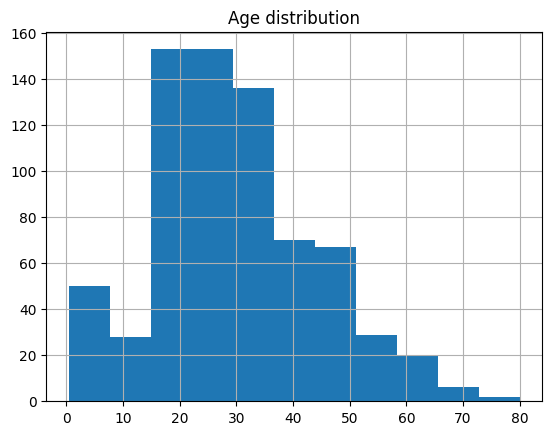

In [40]:
#Study the age column with histogram
titanic_df['Age'].hist(bins='sturges')
plt.title('Age distribution')
plt.show()

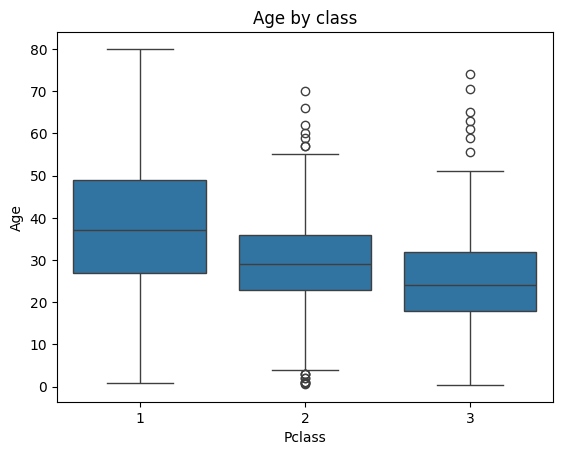

In [41]:
#Age by class
sns.boxplot(x='Pclass', y='Age', data=titanic_df)
plt.title('Age by class')
plt.show()

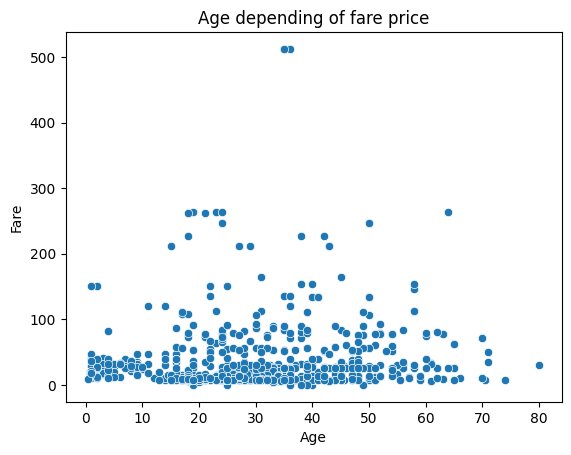

In [42]:
#Age depending of fare price
sns.scatterplot(x='Age', y='Fare', data=titanic_df)
plt.title('Age depending of fare price')
plt.show()

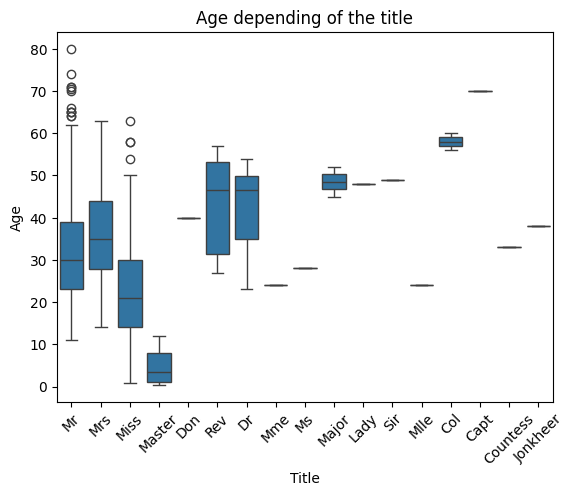

In [43]:
#Age depending of the title
sns.boxplot(x='Title', y='Age', data=titanic_df)
plt.title('Age depending of the title')
plt.xticks(rotation=45)
plt.show()

In [44]:
#Filling the age column using the median by title
age_median_by_title = titanic_df.groupby('Title')['Age'].median()
age_median_by_title

Title
Capt        70.0
Col         58.0
Countess    33.0
Don         40.0
Dr          46.5
Jonkheer    38.0
Lady        48.0
Major       48.5
Master       3.5
Miss        21.0
Mlle        24.0
Mme         24.0
Mr          30.0
Mrs         35.0
Ms          28.0
Rev         46.5
Sir         49.0
Name: Age, dtype: float64

In [45]:
#Filling the column using age_median_by_title
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Title'].map(age_median_by_title))

## Final preparation of the features for the model

In [46]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_name,Ticket_pattern,Ticket_length,Family_size,Family_name_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,E,S,Mr,Braund,A/,1.0,2,Braund2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,Cumings,PC,5.0,2,Cumings2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,E,S,Miss,Heikkinen,STON/O,1.0,1,Heikkinen1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,Futrelle,NaN,6.0,2,Futrelle2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B,S,Mr,Allen,NaN,6.0,1,Allen1


In [47]:
titanic_df['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [48]:
title_category_mapping = {
    'Mr': 'Mr',
    'Miss': 'Miss',
    'Mrs': 'Mrs',
    'Master': 'Master',
    'Dr': 'Dr',
    'Rev': 'Rev',
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs',
    'Countess': 'Noble',
    'Capt': 'Military',
    'Sir': 'Noble',
    'Lady': 'Noble',
    'Jonkheer': 'Noble',
    'Don': 'Noble',
    'Col': 'Military',
    'Major': 'Military'
}

In [49]:
# Map the 'Title' values to the categories
titanic_df['Title'] = titanic_df['Title'].map(title_category_mapping)

In [50]:
# Create bucket of ages with ordinal labels
titanic_df['Age_bucket'] = pd.cut(titanic_df['Age'], bins=[0, 12, 18, 60, 120], labels=['Child', 'Teen', 'Adult', 'Elderly'])

In [51]:
titanic_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_name,Ticket_pattern,Ticket_length,Family_size,Family_name_size,Age_bucket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,E,S,Mr,Braund,A/,1.0,2,Braund2,Adult


In [71]:
#IsAlone feature based on the family size
titanic_df['IsAlone'] = (titanic_df['Family_size'] == 1).astype(int)

In [72]:
#Creation of list of columns to one hot encode, to ordinal encode, to drop, to scale
columns_to_one_hot_encode = ['Embarked', 'Title']
columns_to_binary_encode = ['Sex', 'IsAlone']
columns_to_ordinal_encode = ['Age_bucket','Pclass']
target = 'Survived'

## Feature Transformation

In [73]:
# Define the order of categories for ordinal encoding
ordinal_categories = [
    ['Child', 'Teen', 'Adult', 'Elderly'], 
    [1,2,3],
]

In [74]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

one_hot_transformers = [
    ('one_hot_encode', OneHotEncoder(), columns_to_one_hot_encode)
]

binary_encode_transformers = [
    ('binary_encode', OrdinalEncoder(), columns_to_binary_encode)
]

ordinal_encode_transformers = [
    ('ordinal_encode', OrdinalEncoder(categories=ordinal_categories), columns_to_ordinal_encode)
]

std_scale_transformers = [
    ('std_scale', StandardScaler(), ['Fare','Family_size'])
]

In [75]:
all_transformers = one_hot_transformers + binary_encode_transformers + ordinal_encode_transformers + std_scale_transformers 
all_transformers

[('one_hot_encode', OneHotEncoder(), ['Embarked', 'Title']),
 ('binary_encode', OrdinalEncoder(), ['Sex', 'IsAlone']),
 ('ordinal_encode',
  OrdinalEncoder(categories=[['Child', 'Teen', 'Adult', 'Elderly'], [1, 2, 3]]),
  ['Age_bucket', 'Pclass']),
 ('std_scale', StandardScaler(), ['Fare', 'Family_size'])]

In [76]:
# Create column transformer
preprocessor = ColumnTransformer(all_transformers, remainder='drop')
preprocessor

ColumnTransformer(transformers=[('one_hot_encode', OneHotEncoder(),
                                 ['Embarked', 'Title']),
                                ('binary_encode', OrdinalEncoder(),
                                 ['Sex', 'IsAlone']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['Child', 'Teen',
                                                             'Adult',
                                                             'Elderly'],
                                                            [1, 2, 3]]),
                                 ['Age_bucket', 'Pclass']),
                                ('std_scale', StandardScaler(),
                                 ['Fare', 'Family_size'])])

In [77]:
# Split your dataset into training and testing sets
X = titanic_df.drop(target, axis=1)  # Assuming 'Survived' is the target variable
y = titanic_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

![alt text](LogReg_1.png)

In [78]:
# Define final pipeline including preprocessor and estimator
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())    # Add additional steps if needed, e.g., model fitting
])

In [79]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('one_hot_encode',
                                                  OneHotEncoder(),
                                                  ['Embarked', 'Title']),
                                                 ('binary_encode',
                                                  OrdinalEncoder(),
                                                  ['Sex', 'IsAlone']),
                                                 ('ordinal_encode',
                                                  OrdinalEncoder(categories=[['Child',
                                                                              'Teen',
                                                                              'Adult',
                                                                              'Elderly'],
                                                                             [1,
                                                                              2,
                                                                              3]]),
                                                  ['Age_bucket', 'Pclass']),
                                                 ('std_scale', StandardScaler(),
                                                  ['Fare', 'Family_size'])])),
                ('classifier', LogisticRegression())])

In [80]:
# Fit the pipeline (including preprocessing and logistic regression) on the training data
pipeline.fit(X_train, y_train)

# Predict on the testing data
y_pred = pipeline.predict(X_test)

In [81]:
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8156


## KNN Classifier

In [82]:
#Import KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Define final pipeline including preprocessor and estimator
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())    # Add additional steps if needed, e.g., model fitting
])

In [83]:
pipeline_knn

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('one_hot_encode',
                                                  OneHotEncoder(),
                                                  ['Embarked', 'Title']),
                                                 ('binary_encode',
                                                  OrdinalEncoder(),
                                                  ['Sex', 'IsAlone']),
                                                 ('ordinal_encode',
                                                  OrdinalEncoder(categories=[['Child',
                                                                              'Teen',
                                                                              'Adult',
                                                                              'Elderly'],
                                                                             [1,
                                                                              2,
                                                                              3]]),
                                                  ['Age_bucket', 'Pclass']),
                                                 ('std_scale', StandardScaler(),
                                                  ['Fare', 'Family_size'])])),
                ('classifier', KNeighborsClassifier())])

In [84]:
pipeline_knn.fit(X_train, y_train)

y_pred_knn = pipeline_knn.predict(X_test)

In [85]:
accuracy = accuracy_score(y_test, y_pred_knn)

print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8436


## Random Forest Classifier

#### Decision Tree

![alt text](Decision_Tree.jpg)

#### Random Forest

![alt text](<random forest.png>)

In [86]:
#Creation of pipeline with Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [87]:
#Pipeline random forest
pipeline_rf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('one_hot_encode',
                                                  OneHotEncoder(),
                                                  ['Embarked', 'Title']),
                                                 ('binary_encode',
                                                  OrdinalEncoder(),
                                                  ['Sex', 'IsAlone']),
                                                 ('ordinal_encode',
                                                  OrdinalEncoder(categories=[['Child',
                                                                              'Teen',
                                                                              'Adult',
                                                                              'Elderly'],
                                                                             [1,
                                                                              2,
                                                                              3]]),
                                                  ['Age_bucket', 'Pclass']),
                                                 ('std_scale', StandardScaler(),
                                                  ['Fare', 'Family_size'])])),
                ('classifier', RandomForestClassifier())])

In [88]:
pipeline_rf.fit(X_train, y_train)

y_pred_rf = pipeline_rf.predict(X_test)

In [89]:
accuracy = accuracy_score(y_test, y_pred_rf)

print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8380


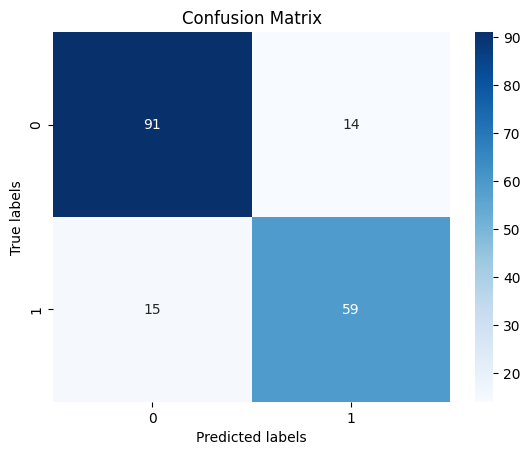

In [90]:
#Seaborn confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [91]:
#Classification report
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred_rf)

In [169]:
print(class_report)

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       105
           1       0.77      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



# Revue des métriques de classification 

![alt text](<../Images/precision recall.png>)